In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy 

In [2]:
df = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [4]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df[df['Transaction Amount']<=0]

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour


In [7]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.560210,0.051705,178.660531,11.266015
std,282.046669,1.419663,10.009471,0.221436,107.388682,6.980659
min,10.000000,1.000000,-2.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


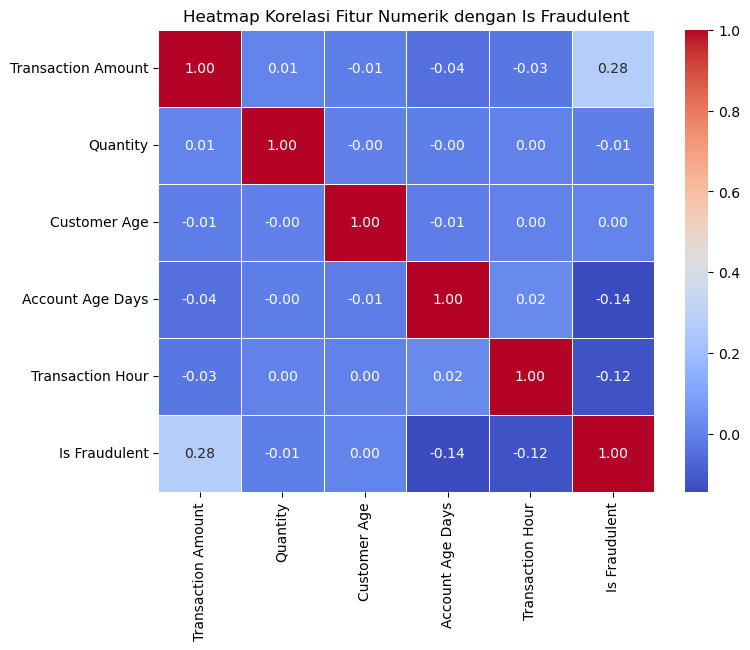

In [17]:

# Pilih kolom numerik + target
num_cols = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']
corr_matrix = df[num_cols + ['Is Fraudulent']].corr(method='pearson')

# Visualisasi semua korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik dengan Is Fraudulent')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Fungsi Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k)-1)))

# Daftar kolom kategorikal
cat_cols = ['Payment Method', 'Product Category', 'Customer Location', 'Device Used']

# Hitung Cramer's V untuk setiap kolom kategorikal terhadap target
cramers_result = {}
for col in cat_cols:
    cramers_result[col] = cramers_v(df[col], df['Is Fraudulent'])

# Ubah jadi DataFrame biar rapi
cramers_df = pd.DataFrame.from_dict(cramers_result, orient='index', columns=['Cramer\'s V']).sort_values(by="Cramer's V", ascending=False)
print(cramers_df)


                   Cramer's V
Customer Location    0.803481
Payment Method       0.012675
Product Category     0.012550
Device Used          0.009341


/var/folders/bd/r5t85swn1w3gyg6xj2fq55g00000gn/T/ipykernel_7204/3100984472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cramers_df['Cramer\'s V'], y=cramers_df.index, palette='coolwarm')


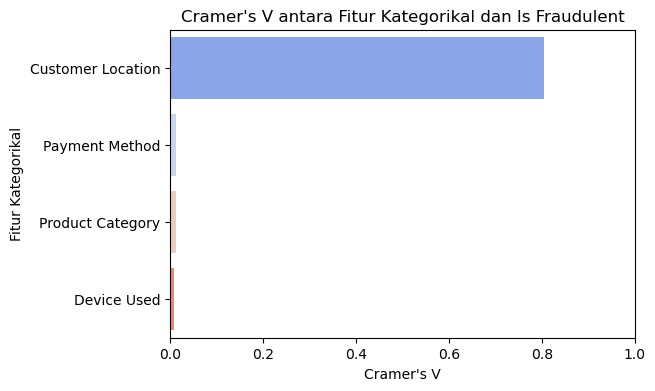

In [14]:
plt.figure(figsize=(6, 4))
sns.barplot(x=cramers_df['Cramer\'s V'], y=cramers_df.index, palette='coolwarm')
plt.title("Cramer's V antara Fitur Kategorikal dan Is Fraudulent")
plt.xlabel("Cramer's V")
plt.ylabel("Fitur Kategorikal")
plt.xlim(0, 1)
plt.show()


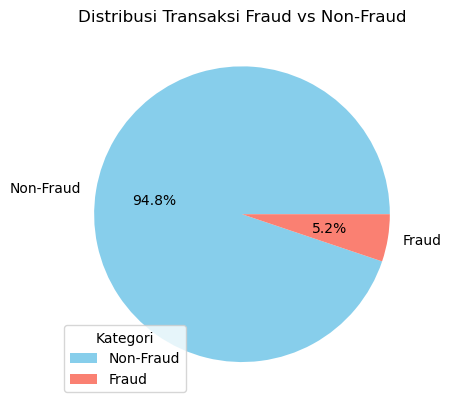

In [9]:
df['Is Fraudulent'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], labels=['Non-Fraud', 'Fraud'])
plt.title('Distribusi Transaksi Fraud vs Non-Fraud')
plt.ylabel('')
plt.legend(title='Kategori', labels=['Non-Fraud', 'Fraud'], loc='best')
plt.show()

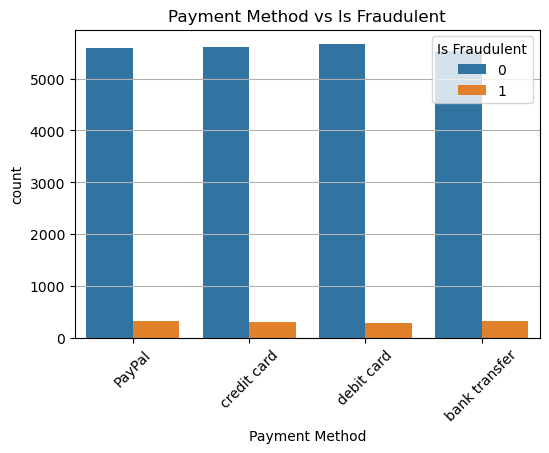

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Payment Method', hue='Is Fraudulent')
plt.title('Payment Method vs Is Fraudulent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

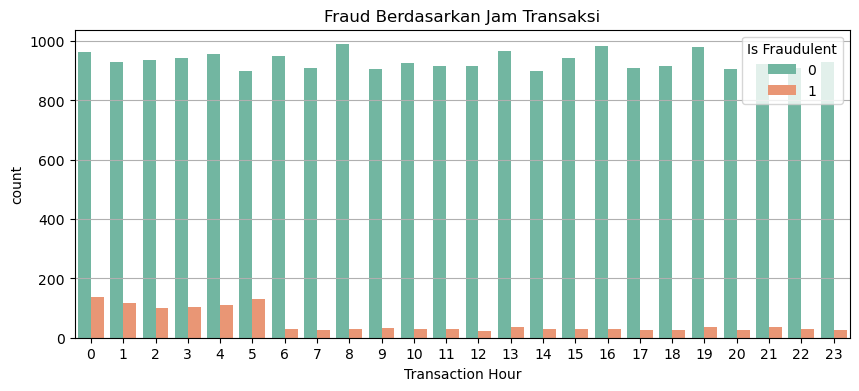

In [18]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Transaction Hour', hue='Is Fraudulent', palette='Set2')
plt.title('Fraud Berdasarkan Jam Transaksi')
plt.grid(axis='y')
plt.show()
